# Introduction to Deep Learning
## Logistic Regression 
Logistic Regression is a fundamental supervised learning algorithm used for binary classification tasks. Despite its name, it's used for classification, not regression. Logistic Regression models the probability that a given input belongs to a particular class.

### Implementation Steps
1. Data Pre-processing
2. Parameter Initialization
3. Forward Propagation:
4. Cost Calculation
5. Backward Propagation
6. Parameter Update
7. Model Evaluation

Let's import libraries we've already learnt and will use

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


### 1. Data Pre-Processing
The dataset contains information that may be used for diagnosing or predicting the presence of heart disease in individuals. It comprises various clinical and demographic features that are commonly considered in cardiovascular health assessment. Understanding and analyzing these features can aid in developing predictive models or understanding the factors associated with heart disease.  
The first 13 fields are 
- Age
- Sex
- Chest Pain Type (cp)
- Resting Blood Pressure (trestbps)
- Serum Cholesterol Level (chol)
- Fasting Blood Sugar (fbs)
- Resting Electrocardiographic Results (restecg)
- Maximum Heart Rate Achieved (thalach)
- Exercise-Induced Angina (exang)
- ST Depression Induced by Exercise Relative to Rest (oldpeak)
- Slope of the Peak Exercise ST Segment (slope)
- Number of Major Vessels Colored by Fluoroscopy (ca)
- Thalassemia (thal)  

And the 14th field is 'target' and is either 0 or 1. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

First, we import data from the csv file provided

In [4]:
dataset_raw = np.genfromtxt("heart.csv", dtype="str", delimiter=",")
print(dataset_raw.shape)

(1026, 14)


This dataset have headers that we don't need for logistic regression model. That is there for us to understand what the values denote  
We seperate the headers

In [5]:
headers = dataset_raw[0, :]
print(headers)

['age' 'sex' 'cp' 'trestbps' 'chol' 'fbs' 'restecg' 'thalach' 'exang'
 'oldpeak' 'slope' 'ca' 'thal' 'target']


And now we get rest of the numerical data and cast them as `float` data type instead of `string`

In [6]:
dataset = dataset_raw[1:, :]
dataset = dataset.astype(float)
print(dataset)

[[52.  1.  0. ...  2.  3.  0.]
 [53.  1.  0. ...  0.  3.  0.]
 [70.  1.  0. ...  0.  3.  0.]
 ...
 [47.  1.  0. ...  1.  2.  0.]
 [50.  0.  0. ...  0.  2.  1.]
 [54.  1.  0. ...  1.  3.  0.]]


In this dataset, the first 13 columns represent the features, while the 14th column indicates whether the individual has the disease or not based on those features. Here we seperate the dataset into X (feature vector) and Y (output vector).

In [7]:
X = dataset[:, :13]
Y = dataset[:, 13]
print(X.shape)
print(Y.shape)

(1025, 13)
(1025,)


Shape of X here is $(m, n_x)$, but we want it to have $shape = (n_x, m)$

In [8]:
X = X.T
print(X.shape)
print(Y.shape)

(13, 1025)
(1025,)


#### Looks good
Finally, we have 1025 examples of 13 features and 1 output  
From the notation you have studied till now  
$$
\begin{align*}
n_x &= 13 \\
n_y &= 1 \\
m &= 1025
\end{align*}
$$
Now we can proceed to making our logistic regression model and train our model  
But, we have one problem to deal with. How would we know if our model is doing good and if it is, how good is it?  
That is why from the 1025 examples we have, we'll keep some data aside and use it to test our model's prediction  
Let's keep 80% of the data for training and 20% of the data for testing our model

In [9]:
# get index to split data in 80:20 ratio
index = int(0.8 * X.shape[1])

# split the data
X_train = X[:, :index]
X_test = X[:, index:]

Y_train = Y[:index]
Y_test = Y[index:]

Let's print shapes for our dataset

In [10]:
print("X_train shape", X_train.shape)
print("Y_train shape", Y_train.shape)
print("Number of training examples =", Y_train.shape[0])
print("-"*40)
print("X_test shape", X_test.shape)
print("Y_test shape", Y_test.shape)
print("Number of testing examples =", Y_test.shape[0])

X_train shape (13, 820)
Y_train shape (820,)
Number of training examples = 820
----------------------------------------
X_test shape (13, 205)
Y_test shape (205,)
Number of testing examples = 205


## Logistic Regression 
#### Forward Propagation
$$
Z = W^T X + b  \\
A = sigmoid(X) \\
$$
#### Calculate Cost
$$
J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})
$$
#### Backward Propagation
$$ \partial W = \frac{\partial J}{\partial W} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \partial b = \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$
#### Parameter Updation
$$ W = W - \alpha \text{ } \partial W $$
$$ b = b - \alpha \text{ } \partial b $$

### 2. Initializing parameters
**Assignment**: Complete the function for parameter initialization in the cell below. 


In [12]:
def init_params(num_features):
    """
    This function creates a vector of zeros of shape (num_features, 1) for w and initializes b to 0.

    Returns:
    W -- initialized vector of shape (num_features, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    W = np.zeros((num_features, 1))
    b = 0

    return W, b


#### **Helper Function**: Sigmoid
**Assignment**: Complete the function for calculating sigmoid in the cell below. 

In [13]:
def sigmoid(x):
    """
    Compute the sigmoid of x

    Return:
    s -- sigmoid(x)
    """
    s = 1 / (1 + np.exp(-x))
    return s


### 3. Forward Propagation
$$
Z = W^T X + b  \\
A = sigmoid(X) \\
$$
**Assignment**: Complete the function implementing forward propagation in the cell below. 

In [14]:
def forward_prop(w, b, X):
    """
    Compute forward propagation

    Return:
    A -- activation
    """
    Z = np.dot(w.T, X) + b
    A = sigmoid(Z)

    return A


### 4. Calculate Cost
$$
J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})
$$
**Assignment**: Complete the function to calculate cost in the cell below. 

In [21]:
def calculate_loss(A, Y):
    """
    Calculate cross entropy loss between calculated values (A) and actual values (Y)

    Return:
    cost -- cost calculated
    """
    # get number of examples
    m = Y.shape[0]
    
    # calculate cost
    cost = (-1 / m) * np.sum(Y * np.log(A + 1e-8) + (1 - Y) * np.log(1 - A + 1e-8))

    # this will remove any useless dimensions from cost
    cost = np.squeeze(cost)

    return cost


### 5. Backward Propagation
$$ \partial W = \frac{\partial J}{\partial W} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \partial b = \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$
**Assignment**: Complete the function to compute gradients in the cell below. 

In [22]:
def backward_prop(A, X, Y):
    """
    Calculate gradients dW and db

    Return:
    dW -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    """
    # get number of examples
    m = X.shape[1]

    # calculate gradients
    dZ = A - Y                      # shape: (1, m)
    dW = (1/m) * np.dot(X, dZ.T)   # shape: (num_features, 1)
    db = (1/m) * np.sum(dZ)        # scalar

    return dW, db


### 6. Parameter Updation
$$ W = W - \alpha \text{ } \partial W $$
$$ b = b - \alpha \text{ } \partial b $$
**Assignment**: Complete the function to update parameters in the cell below. 

In [23]:
def update_params(W, b, dW, db, learning_rate):
    """
    Update params W and b from their gradients

    Return:
    W -- updated W
    b -- updated b
    """
    W = W - learning_rate * dW
    b = b - learning_rate * db

    return W, b


As our model's forward propagation return value calculated from sigmoid function, it lies between 0 and 1  
We can say output should be 1 when A > 0.5 and 0 when A < 0.5  
Let's implement a function that will do this for us in vectorized way
### Predict 

In [24]:
def predict(W, b, X):
  A = forward_prop(W, b, X)
  Y_pred = (A>=0.5)*1.0
  return Y_pred

### Let's compile all these function to implement training loop for our model
You don't need to write any math here, just put all the functions you've written above in the right sequence

In [25]:
def train(X, Y, num_iterations=10000, learning_rate=0.0001, print_cost=True):
    # initialize parameters
    W = np.zeros((X.shape[0], 1))
    b = 0

    costs = []

    for i in range(num_iterations):
        # forward propagation
        A = forward_prop(W, b, X)

        # calculate cost
        cost = calculate_loss(A, Y)

        # backward propagation
        dw, db = backward_prop(A, X, Y)

        # parameter updation
        W, b = update_params(W, b, dw, db, learning_rate)

        # store cost every 100 iterations
        if i % 100 == 0:
            costs.append(cost)

        # print cost
        if print_cost and i % 100 == 0:
            print(f"Cost after {i+1} iteration : {cost}")

    return W, b, costs


### Let the model train

In [26]:
W, b, costs = train(X_train, Y_train)

Cost after 1 iteration : 0.6931471605599454
Cost after 101 iteration : 0.7723672736667179
Cost after 201 iteration : 0.6739935689578312
Cost after 301 iteration : 0.6417824718467297
Cost after 401 iteration : 0.628587442128276
Cost after 501 iteration : 0.6229415031132706
Cost after 601 iteration : 0.6201697230695079
Cost after 701 iteration : 0.6184454278495893
Cost after 801 iteration : 0.6171017170407714
Cost after 901 iteration : 0.6159022833821755
Cost after 1001 iteration : 0.6147637062715814
Cost after 1101 iteration : 0.6136560182087498
Cost after 1201 iteration : 0.612567877205917
Cost after 1301 iteration : 0.6114944652389327
Cost after 1401 iteration : 0.6104332973348795
Cost after 1501 iteration : 0.6093827712677746
Cost after 1601 iteration : 0.6083416636881731
Cost after 1701 iteration : 0.6073089520384596
Cost after 1801 iteration : 0.6062837481916575
Cost after 1901 iteration : 0.605265270278909
Cost after 2001 iteration : 0.6042528276113867
Cost after 2101 iteration : 

Let's plot costs to see how our model was converging

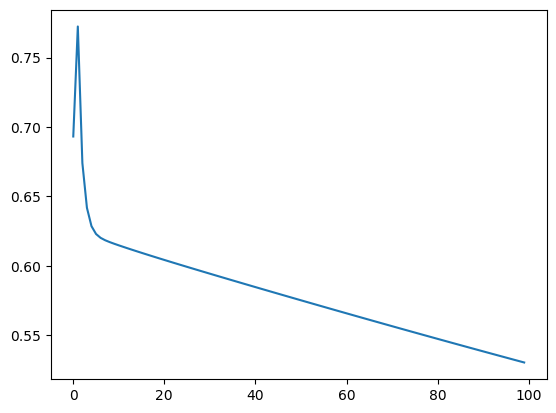

In [27]:
plt.plot(costs)
plt.show()

### 7. Model Evaluation
Let's check accuracy on train and test sets

In [28]:
print("Train accuracy: {} %".format(100 - np.mean(np.abs(predict(W, b, X_train) - Y_train)) * 100))
print("Test accuracy: {} %".format(100 - np.mean(np.abs(predict(W, b, X_test) - Y_test)) * 100))

Train accuracy: 73.29268292682926 %
Test accuracy: 71.21951219512195 %



Increasing the number of iterations can improve training accuracy, but there's a risk of overfitting. Overfitting occurs when the model learns to fit the training data too closely, capturing noise or irrelevant patterns that don't generalize well to unseen data. In such cases, while the training accuracy continues to increase, the test accuracy may plateau or even decrease.

To address overfitting, techniques like regularization and model complexity reduction are employed. Additionally, the transition to deep neural networks offers more sophisticated methods for improving accuracies, even in the presence of overfitting.